# EX2_1
build dilate and erode functions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



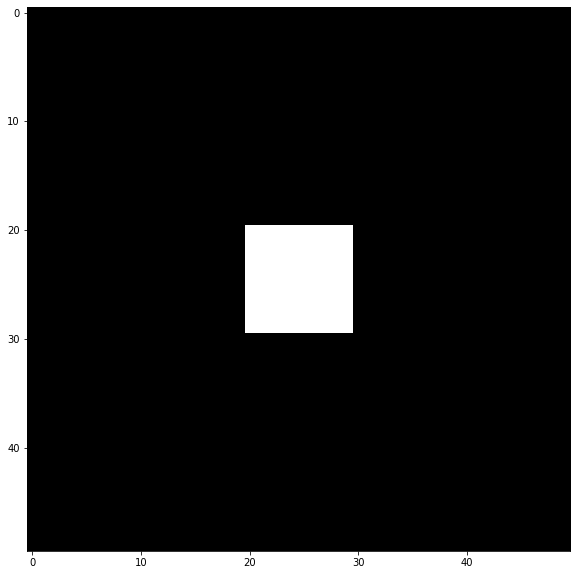

In [3]:

img = np.zeros((50, 50))
img[20:30, 20:30] = 1

plt.figure(figsize=figsize)
plt.imshow(img,cmap="gray")
plt.show()



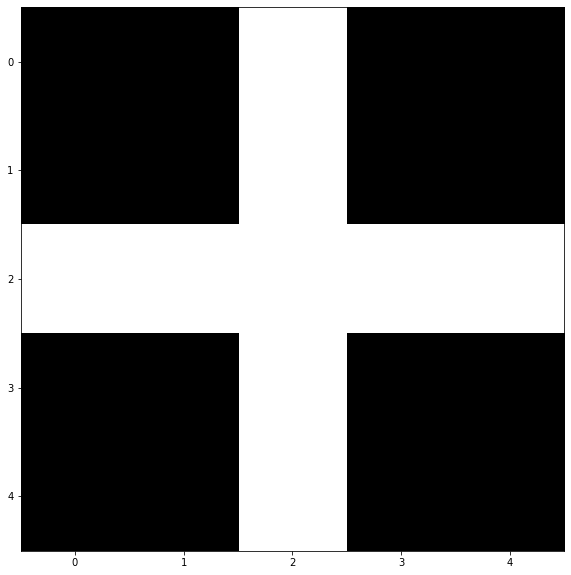

In [4]:
kernel = np.zeros((5,5),dtype=np.uint8)
kernel[2,:] = 1
kernel[:,2] = 1


plt.figure(figsize=figsize)
plt.imshow(kernel,cmap="gray")
plt.show()



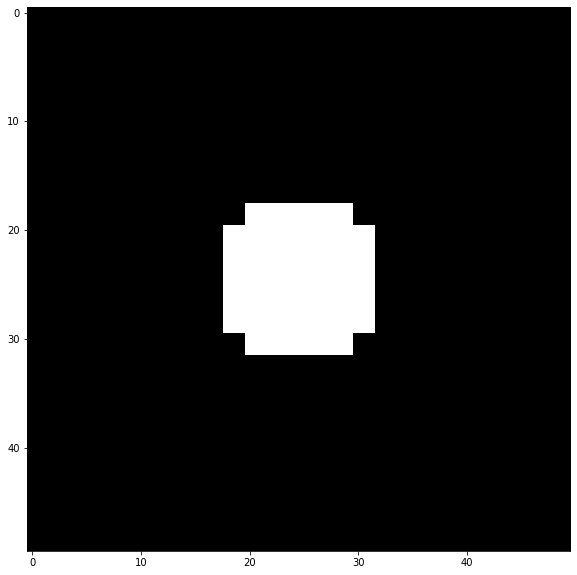

In [11]:
def my_dilate(img,kernel):
    #TODO: build dilate function without cv2.dilate
    #return cv2.dilate(img, kernel)
    pad = [kernel_size//2 for kernel_size in kernel.shape ]    
    img2 = img.copy()
    for h in range(pad[0], img.shape[0]-pad[0]) :
        for w in range(pad[1], img.shape[1]-pad[1]) :
            window = img[(h-pad[0]):(h+pad[0]+1), (w-pad[1]):(w+pad[1]+1)] 
            #img2[h, w] =  np.sum( np.logical_and(window, kernel) ) !=0
            img2[h, w] =  (np.logical_and(window, kernel)==1).any()
    return img2
                
plt.figure(figsize=figsize)
plt.imshow(my_dilate(img,kernel),cmap="gray")
plt.show()



In [12]:
# TODO: show that cv2.dilate and my_dilate are the same using absolute difference
expected_img = cv2.dilate(img, kernel)
my_dilated_img = my_dilate(img,kernel)

if np.sum(np.absolute(expected_img-my_dilated_img))==0 :
    print("cv2.dilate & my_dilate are the same!")
else: 
    print("try again...")



cv2.dilate & my_dilate are the same!


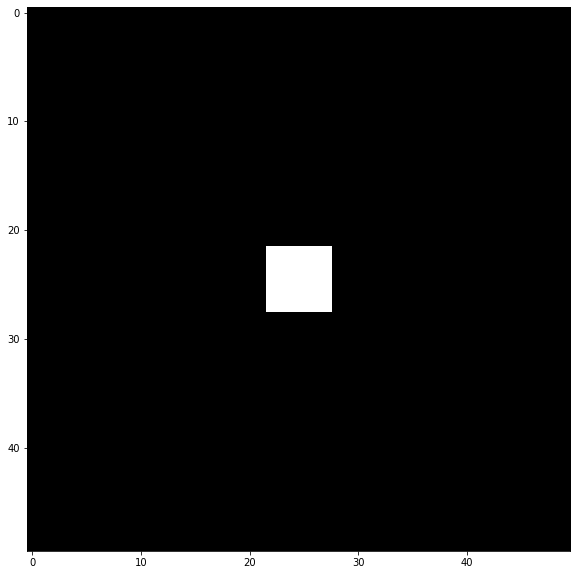

In [ ]:
def my_erode(img,kernel):
    #TODO: build erode function without cv2.erode
    #return cv2.erode(img, kernel)
    pad = [kernel_size//2 for kernel_size in kernel.shape ]    
    img2 = img.copy()
    for h in range(pad[0], img.shape[0]-pad[0]) :
        for w in range(pad[1], img.shape[1]-pad[1]) :
            img2[h, w] = (int) (np.sum(img[(h-pad[0]):(h+pad[0]+1), (w-pad[1]):(w+pad[1]+1)]*kernel)/np.sum(kernel))
    return img2


plt.figure(figsize=figsize)
plt.imshow(my_erode(img,kernel),cmap="gray")
plt.show()



In [ ]:
# TODO: show that cv2.erode and my_erode are the same using absolute difference
expected_img = cv2.erode(img, kernel)
my_eroded_img = my_erode(img,kernel)

if np.sum(np.absolute(expected_img-my_eroded_img))==0 :
    print("cv2.erode & my_erode are the same!")
else: 
    print("try again...")



cv2.erode & my_erode are the same!
